In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\Asus\OneDrive\Desktop\HeartData.csv")

In [3]:
data.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,olpeak,slope,ca,tha,heart_disease
0,29,1,2.0,130,204.0,0,2.0,202,0,0.0,1,0,3,No
1,34,1,1.0,118,182.0,0,2.0,174,0,0.0,1,0,3,No


# Exploratory Data Analysis

In [4]:
# making copy of output variable to understand what values are assigned to each label
data['heart_disease_act']=data['heart_disease'].copy()

In [5]:
# Label Encoding (convert heart_disease column to numerial)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['heart_disease']=encoder.fit_transform(data['heart_disease'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                303 non-null    int64  
 1   sex                303 non-null    int64  
 2   cp                 302 non-null    float64
 3   trestbps           303 non-null    int64  
 4   chol               301 non-null    float64
 5   fbs                303 non-null    int64  
 6   restecg            302 non-null    float64
 7   thalach            303 non-null    int64  
 8   exange             303 non-null    int64  
 9   olpeak             302 non-null    float64
 10  slope              303 non-null    int64  
 11  ca                 303 non-null    int64  
 12  tha                303 non-null    int64  
 13  heart_disease      303 non-null    int32  
 14  heart_disease_act  303 non-null    object 
dtypes: float64(4), int32(1), int64(9), object(1)
memory usage: 34.4+ KB


In [7]:
data.shape

(303, 15)

In [8]:
data.describe(include='all') # 'all' gives descriptive statistics for categprical variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,olpeak,slope,ca,tha,heart_disease,heart_disease_act
count,303.000000,303.000000,302.000000,303.000000,301.000000,303.000000,302.000000,303.000000,303.000000,302.000000,303.000000,303.000000,303.000000,303.000000,303
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,164
mean,54.630363,0.679868,3.155629,131.689769,246.485050,0.148515,0.986755,149.607261,0.326733,1.091722,1.600660,0.679868,4.732673,0.458746,NaN
std,9.551291,0.467299,0.960491,17.599748,51.884846,0.356198,0.994916,22.875003,0.469794,1.372305,0.616226,0.934878,1.937215,0.499120,NaN
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,NaN
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,NaN
50%,56.000000,1.000000,3.000000,130.000000,240.000000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,NaN
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000,NaN


In [9]:
# data.columns.tolist()

In [10]:
data.nunique()

age                   43
sex                    2
cp                     4
trestbps              50
chol                 152
fbs                    2
restecg                3
thalach               91
exange                 2
olpeak                41
slope                  3
ca                     4
tha                    3
heart_disease          2
heart_disease_act      2
dtype: int64

In [11]:
data['olpeak'].unique()

array([ 0. ,  0.7,  1.4,  1.6,  3.5, 12. ,  1.2,  2. ,  0.6,  0.8,  1.8,
        1.5,  2.5,  3. ,  0.2,  1.9,  0.1,  0.4,  0.3,  2.8,  3.6,  1. ,
        0.5,  2.6,  1.1,  0.9,  2.4,  4.2,  3.1,  2.2,  3.2,  5.6,  3.4,
        1.3,  4. ,  2.1,  4.4,  6.2,  2.3,  2.9,  nan,  8. ])

In [12]:
data.isna().sum()

age                  0
sex                  0
cp                   1
trestbps             0
chol                 2
fbs                  0
restecg              1
thalach              0
exange               0
olpeak               1
slope                0
ca                   0
tha                  0
heart_disease        0
heart_disease_act    0
dtype: int64

# Missing value imputation

In [13]:
import statistics as st

In [14]:
data['cp'].fillna(st.mode(data['cp']), inplace=True)

In [15]:
data['restecg'].fillna(st.mode(data['restecg']), inplace=True)

In [16]:
# data['cp']=data['cp'].fillna(st.mode(data['cp']))
# data['restecg']=data['restecg'].fillna(st.mode(data['restecg']))

In [17]:
data['chol'].fillna(data['chol'].mean(), inplace=True) # if the data is skewed, then median better over mean
data['olpeak'].fillna(data['olpeak'].mean(), inplace=True)  # mean is affected by extreame values

In [18]:
# data['chol']=data['chol'].fillna(data['chol'].mean())
# data['olpeak']=data['olpeak'].fillna(data['olpeak'].mean())

In [19]:
data.isna().sum()

age                  0
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exange               0
olpeak               0
slope                0
ca                   0
tha                  0
heart_disease        0
heart_disease_act    0
dtype: int64

In [20]:
# data.chol.median()

In [21]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp.fit_transform(data['chol'])

# from sklearn.impute import IterativeImputer
# imp = IterativeImputer(max_iter=10, random_state=0)
# imp.fit_transform(X)    # X is a multidimentional data

## Checking balance and imbalance in data (*required for classification problems)

In [22]:
# Dealing with Imbalance data
##(1) Oversampling case: When we add sample to minority class
from imblearn.over_sampling import SMOTE

data_test=data # just for understanding how the method works, not implemented in my model

In [23]:
zero_n=data['heart_disease'].value_counts()
zero_n,zero_n/zero_n.sum()*100

(0    164
 1    139
 Name: heart_disease, dtype: int64,
 0    54.125413
 1    45.874587
 Name: heart_disease, dtype: float64)

<AxesSubplot:>

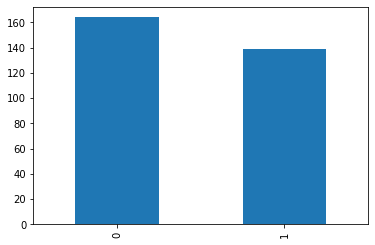

In [24]:
 data_test['heart_disease'].value_counts().plot(kind = 'bar')

In [25]:
data_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,olpeak,slope,ca,tha,heart_disease,heart_disease_act
0,29,1,2.0,130,204.0,0,2.0,202,0,0.0,1,0,3,0,No
1,34,1,1.0,118,182.0,0,2.0,174,0,0.0,1,0,3,0,No
2,34,0,2.0,118,210.0,0,0.0,192,0,0.7,1,0,3,0,No
3,35,0,4.0,138,183.0,0,0.0,182,0,1.4,1,0,3,0,No
4,35,1,4.0,120,198.0,0,0.0,130,1,1.6,2,0,7,1,Yes


In [26]:
X_t=data_test.iloc[:,:-2]
Y_t=data_test.iloc[:,-1:]

In [27]:
# data_test.loc[:,['chol','fbs']]

In [28]:
smote=SMOTE(random_state=1)
X_t_over, Y_t_over=smote.fit_resample(X_t, Y_t)

<AxesSubplot:xlabel='heart_disease_act'>

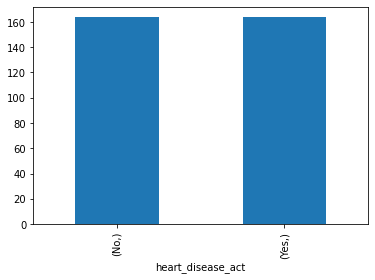

In [29]:
Y_t_over.value_counts().plot(kind='bar')

In [30]:
##(2) Undersampling case: When we remove sample from majority class
from imblearn.under_sampling import NearMiss

In [31]:
nearmiss=NearMiss() # NearMiss doesn't take the argument random_state
X_t_under, Y_t_under=nearmiss.fit_resample(X_t, Y_t)

<AxesSubplot:xlabel='heart_disease_act'>

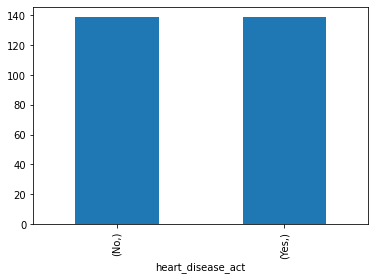

In [32]:
Y_t_under.value_counts().plot(kind='bar')


# Visualization & correlation

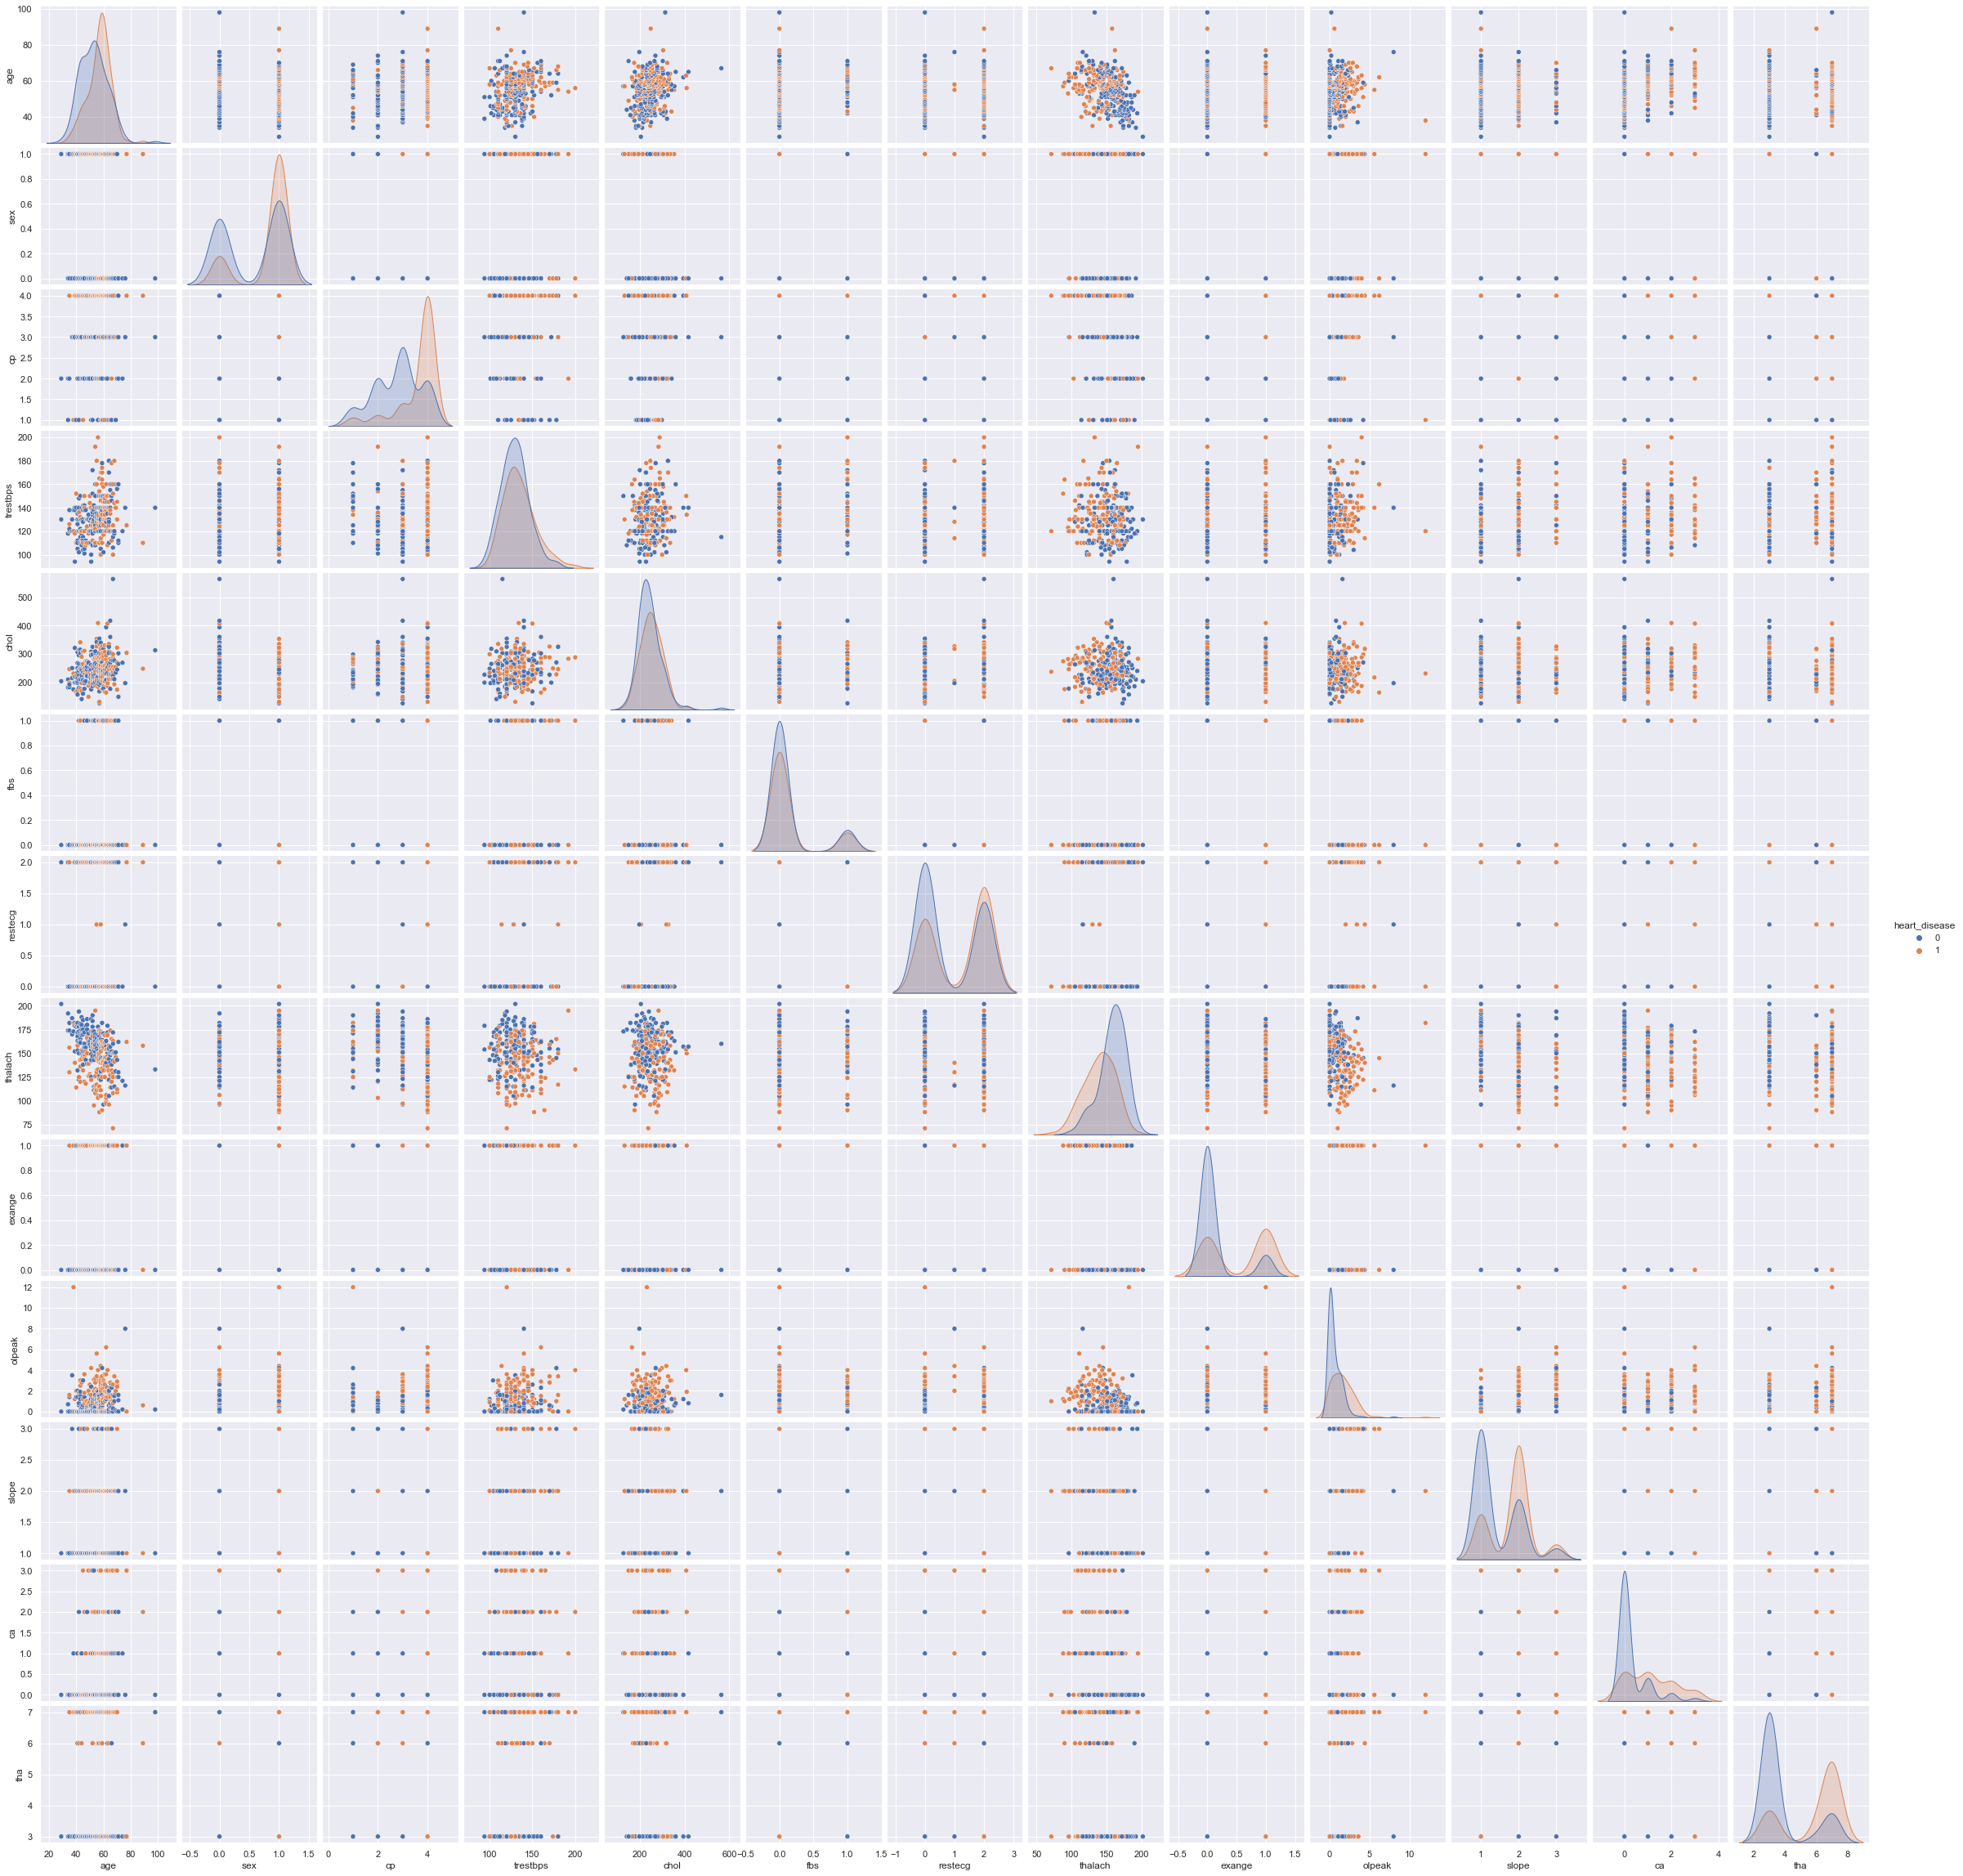

In [33]:
sns.set()
sns.pairplot(data,hue='heart_disease') # pairplot has "height" argument which can be use to define size of each plot in pairplot

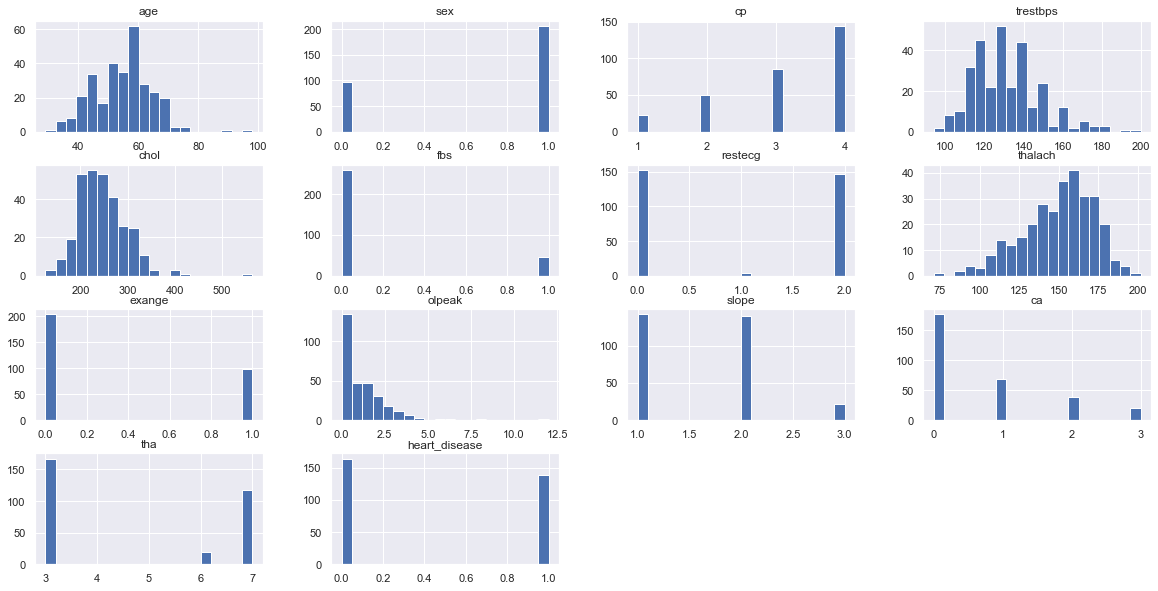

In [34]:
# Distribution of data
data.hist(bins=20, figsize=(20, 10)) # bins is used to make the intervals for numerical data
plt.show()

In [35]:
# correlation matrix without taking care of categorical and continous
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exange,olpeak,slope,ca,tha,heart_disease
age,1.000000,-0.103756,0.103898,0.264964,0.215513,0.103785,0.124106,-0.378175,0.072757,0.159227,0.133488,0.340106,0.139420,0.209334
sex,-0.103756,1.000000,0.010084,-0.064456,-0.202928,0.047862,0.031334,-0.048663,0.146201,0.073471,0.037533,0.098134,0.384323,0.276816
cp,0.103898,0.010084,1.000000,-0.036077,0.070706,-0.039975,0.075543,-0.334422,0.384060,0.122103,0.152050,0.226381,0.266742,0.414446
trestbps,0.264964,-0.064456,-0.036077,1.000000,0.126181,0.175340,0.150995,-0.045351,0.064762,0.157719,0.117382,0.097385,0.133430,0.150825
chol,0.215513,-0.202928,0.070706,0.126181,1.000000,0.006590,0.164275,-0.004102,0.055603,0.020418,-0.002992,0.116579,0.009428,0.080893
fbs,0.103785,0.047862,-0.039975,0.175340,0.006590,1.000000,0.072346,-0.007854,0.025665,-0.011043,0.059894,0.143248,0.076922,0.025264
restecg,0.124106,0.031334,0.075543,0.150995,0.164275,0.072346,1.000000,-0.075072,0.075335,0.079845,0.140446,0.118906,0.025193,0.175335
thalach,-0.378175,-0.048663,-0.334422,-0.045351,-0.004102,-0.007854,-0.075072,1.000000,-0.378103,-0.286289,-0.385601,-0.261691,-0.272874,-0.417167
exange,0.072757,0.146201,0.384060,0.064762,0.055603,0.025665,0.075335,-0.378103,1.000000,0.259905,0.257748,0.140932,0.332785,0.431894
olpeak,0.159227,0.073471,0.122103,0.157719,0.020418,-0.011043,0.079845,-0.286289,0.259905,1.000000,0.511472,0.219720,0.296993,0.364392


<AxesSubplot:>

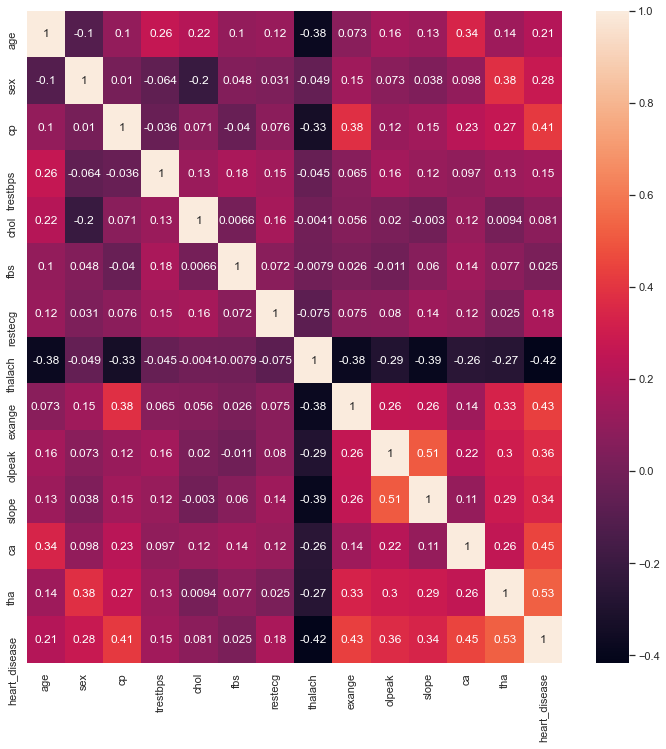

In [36]:
# correlation matrix without taking care of categorical and continous
sns.set()
fig, ax=plt.subplots(figsize=(12,12))
sns.heatmap(data.corr(), ax=ax, annot=True)

In [37]:
data_cate=data[['sex','cp','fbs','restecg','exange','slope','ca','tha']]
data_cont=data.drop(data_cate.columns.tolist()+['heart_disease','heart_disease_act'], axis=1)

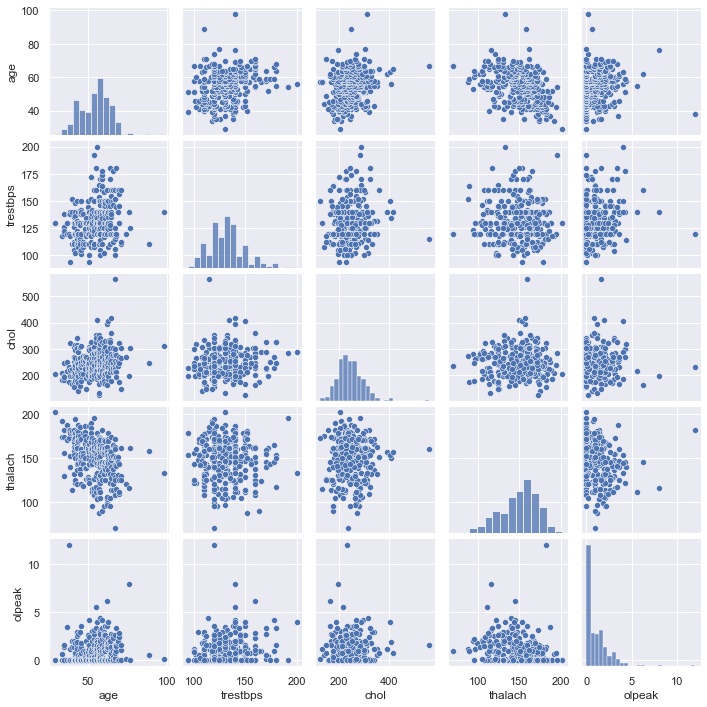

In [38]:
# pairplot for continous variables
sns.set()
sns.pairplot(data_cont, size=2)  # size=height are same arguments use for fig size

<AxesSubplot:>

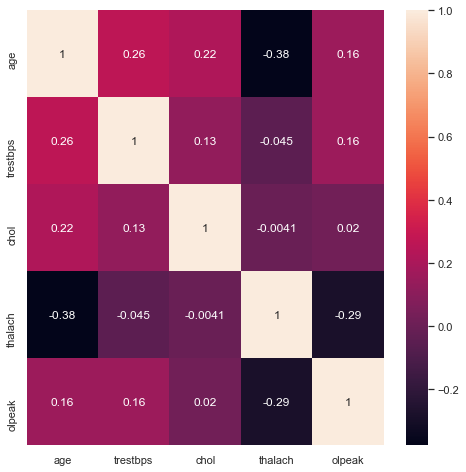

In [39]:
sns.set(rc={'figure.figsize':(8,8)})
sns.heatmap(data_cont.corr(), annot=True)

In [40]:
# chi square test for categorical variables
from scipy.stats import chi2_contingency

# H0: There is no significant relationship between both the variables     vs
# H1: There is significant relationship between both the variables

stat, p_val, dof, expected = chi2_contingency(pd.crosstab(index=data_cate.ca, columns=data_cate.fbs))

if p_val<0.05:
    print('There is significant relationship between both the variables.')
else:
    print('There is insignificant relationship between both the variables.')

There is insignificant relationship between both the variables.


In [41]:
len(data_cate.columns)

8

In [42]:
p_val

0.07471148164405114

In [43]:
def chi_2_test(var1, var2):
    stat, p_val, dof, expected = chi2_contingency(pd.crosstab(index=var1, columns=var2))
    if p_val<0.05:
        return print("p_value={} and alpha=0.05.\nThere is significant relationship between both the variables.".format(p_val))
    else:
        return print("p_value={} and alpha=0.05.\nThere is insignificant relationship between both the variables.".format(p_val))
        

In [44]:
# all combinations of categorical variables
from itertools import combinations
list(combinations(data_cate.columns.tolist(),2))

[('sex', 'cp'),
 ('sex', 'fbs'),
 ('sex', 'restecg'),
 ('sex', 'exange'),
 ('sex', 'slope'),
 ('sex', 'ca'),
 ('sex', 'tha'),
 ('cp', 'fbs'),
 ('cp', 'restecg'),
 ('cp', 'exange'),
 ('cp', 'slope'),
 ('cp', 'ca'),
 ('cp', 'tha'),
 ('fbs', 'restecg'),
 ('fbs', 'exange'),
 ('fbs', 'slope'),
 ('fbs', 'ca'),
 ('fbs', 'tha'),
 ('restecg', 'exange'),
 ('restecg', 'slope'),
 ('restecg', 'ca'),
 ('restecg', 'tha'),
 ('exange', 'slope'),
 ('exange', 'ca'),
 ('exange', 'tha'),
 ('slope', 'ca'),
 ('slope', 'tha'),
 ('ca', 'tha')]

In [45]:
chi_2_test(data_cate.exange,data_cate.cp)

p_value=3.0515646531482735e-14 and alpha=0.05.
There is significant relationship between both the variables.


In [46]:
data.nunique()

age                   43
sex                    2
cp                     4
trestbps              50
chol                 153
fbs                    2
restecg                3
thalach               91
exange                 2
olpeak                42
slope                  3
ca                     4
tha                    3
heart_disease          2
heart_disease_act      2
dtype: int64

# Outliers detection and treatment

<AxesSubplot:>

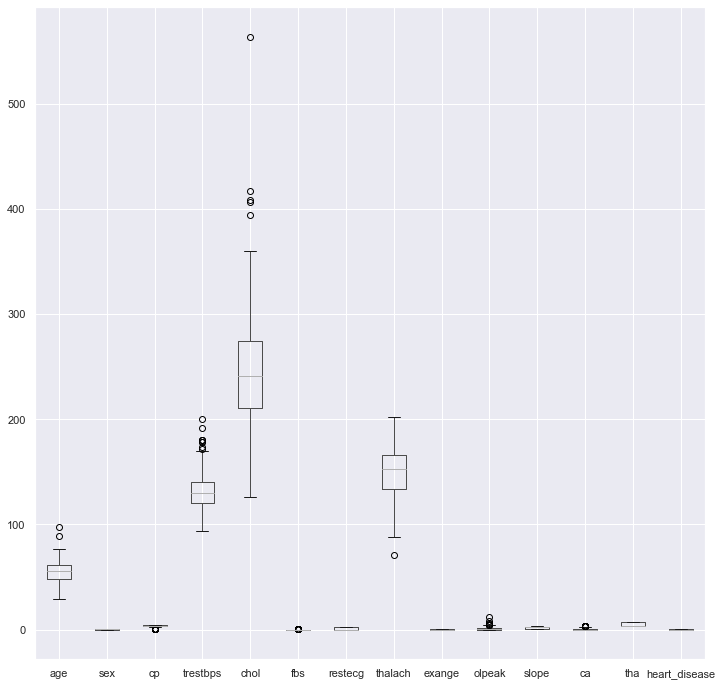

In [47]:
plt.figure(figsize=(12,12))
# plt.ylim([0,10])
data.boxplot()

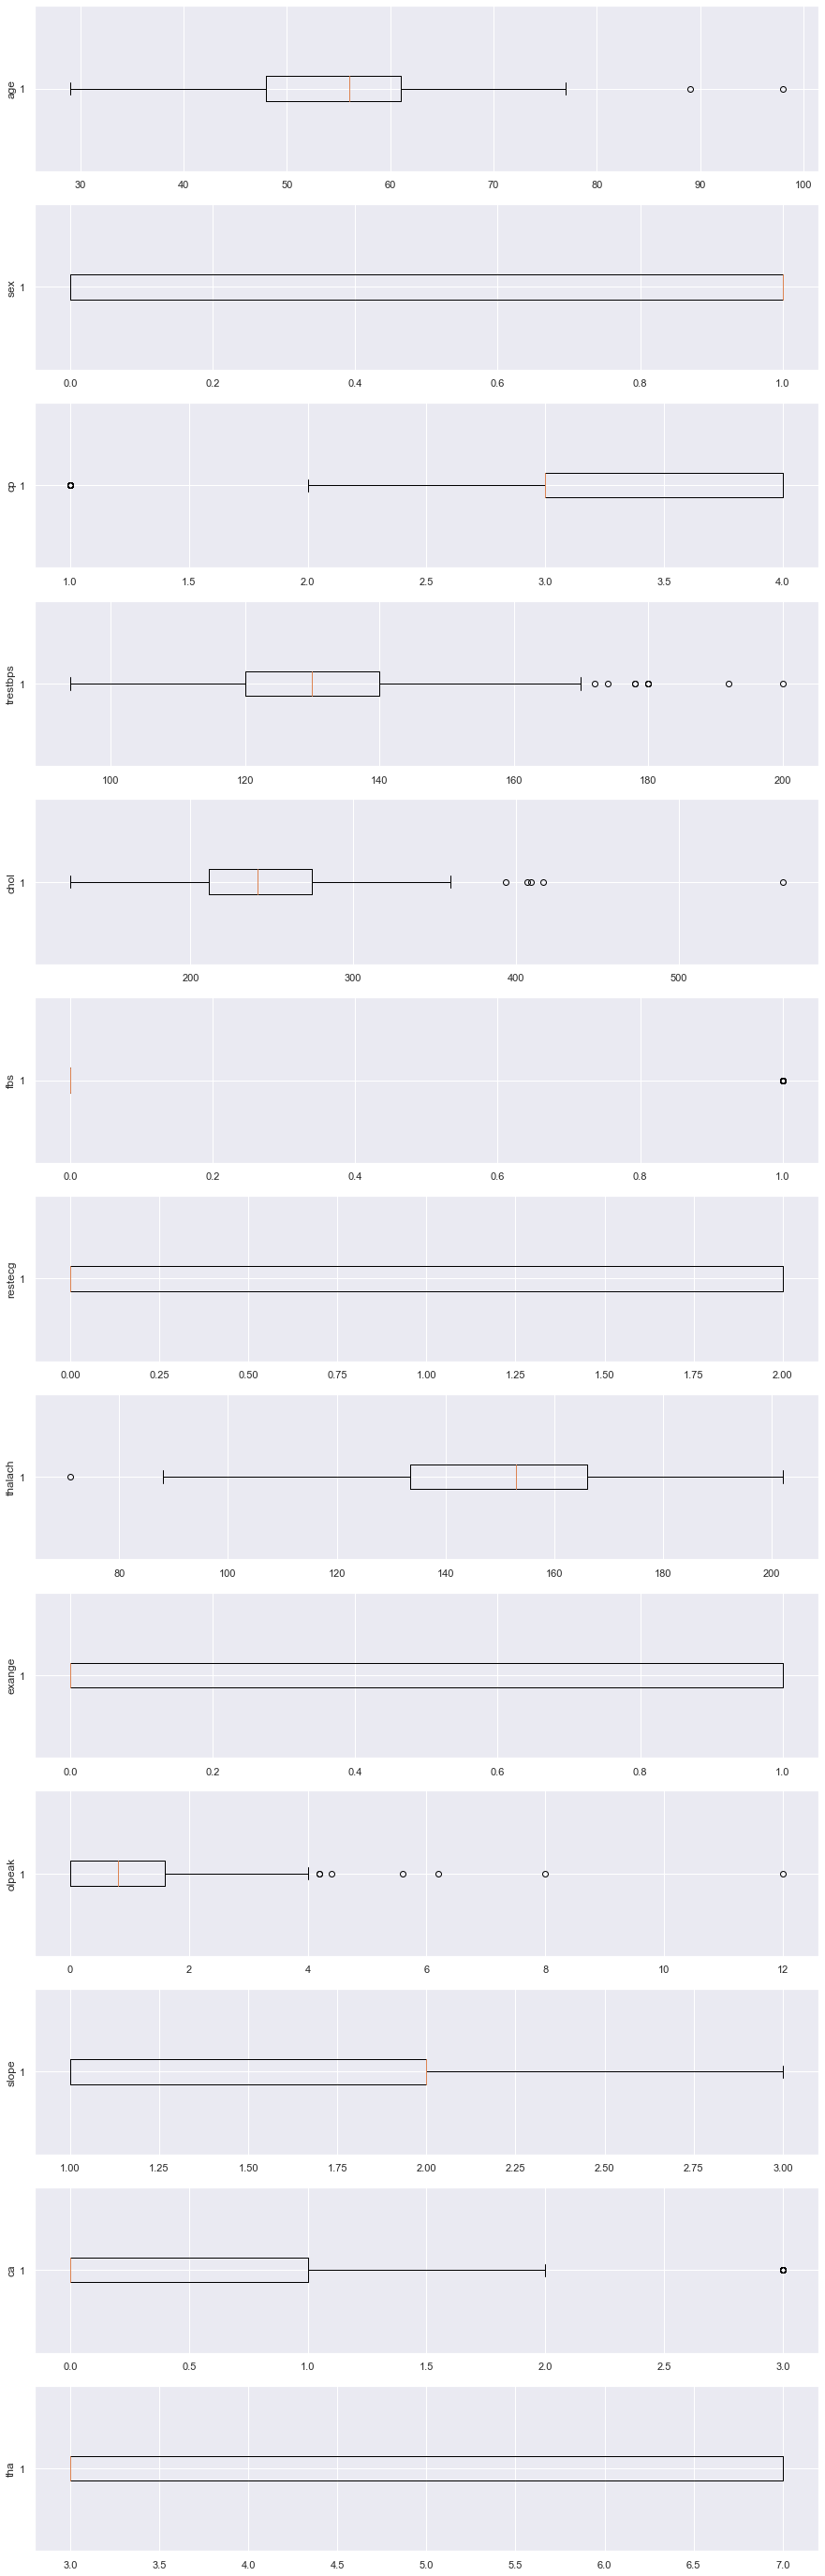

In [48]:
XX=data.iloc[:,:-2]
fig, ax=plt.subplots(13,1, figsize=(15,50))
i=0
for col in XX.columns:
    ax[i].boxplot(data[col], vert=False)
    ax[i].set_ylabel(col)
    i=i+1
    

{'whiskers': [<matplotlib.lines.Line2D at 0x1a557546070>,
 'caps': [<matplotlib.lines.Line2D at 0x1a557546730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a55753acd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a557546df0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a557554190>],
 'means': []}

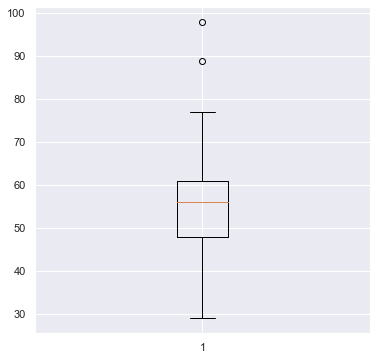

In [49]:
plt.figure(figsize=(6,6))
plt.boxplot(data['age'])

<AxesSubplot:xlabel='chol'>

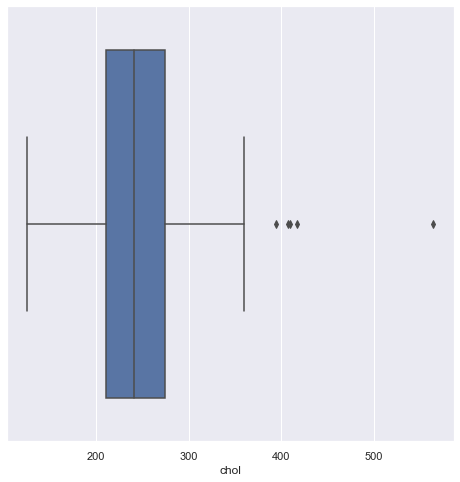

In [50]:
sns.boxplot(data['chol'])

In [51]:
# np.percentile(data.age,25)

### removal of outliers from the data

In [52]:
# mu_chol=np.mean(data.chol)
# std_chol=np.std(data.chol)
# UL=mu_chol+3*std_chol
# LL=mu_chol-3*std_chol
# up_ind=np.where(data.chol>UL)[0]
# dwn_ind=np.where(data.chol<LL)[0]
# data.drop(index=dwn_ind, inplace=True)
# data.drop(index=up_ind, inplace=True)

In [53]:
# outiler removal from each column
df=data.columns.tolist()[:-2]

for i in df:
    mu_chol=np.mean(data[i])   
    std_chol=np.std(data[i])    
    UL=mu_chol+3*std_chol        
    LL=mu_chol-3*std_chol
    up_ind=np.where(data[i]>UL)[0]
    dwn_ind=np.where(data[i]<LL)[0]
    data.drop(index=dwn_ind, inplace=True)
    data.drop(index=up_ind, inplace=True)
    data.reset_index(inplace = True,  drop=True)
    


In [54]:
# df=data.columns.tolist()[:-1]

# for i in df:
#     Q1=np.percentile(data[i],25)
#     Q3=np.percentile(data[i],75)
#     IQR=Q3-Q1
#     UL=Q3+1.5*IQR
#     LL=Q1-1.5*IQR
#     up_ind=np.where(data[i]>UL)[0]
#     dwn_ind=np.where(data[i]<LL)[0]
#     data.drop(index=dwn_ind, inplace=True)
#     data.drop(index=up_ind, inplace=True)
#     data.reset_index(inplace = True, drop=True)

In [55]:
data.shape

(290, 15)

In [56]:
data_out=data

### outlier replacement using winsorization method

In [57]:
from scipy.stats.mstats import winsorize
# wins_data=winsorize(data, (0,0.01))

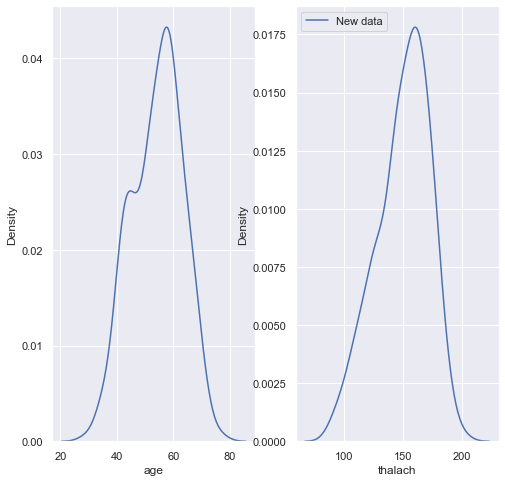

In [58]:
fig, ax=plt.subplots(1,2)
sns.distplot(data['age'], hist=False, label='Orginal data', ax=ax[0])
sns.distplot(data['thalach'], hist=False, label='New data', ax=ax[1])
plt.legend(loc='upper left')

# Multicollinearity detection and removal 

## Detection of Multicollinearity using Variance Inflation Factor (VIF)

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
X=data.iloc[:,:-2]
Y=data.iloc[:,-2:-1]

In [61]:
vif_df=pd.DataFrame()
vif_df['Features']=X.columns

vif_df['VIF']=[variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif_df

,Features,VIF
0,age,44.635430
1,sex,4.226375
2,cp,13.810526
3,trestbps,64.676612
4,chol,31.206080
5,fbs,1.249684
6,restecg,2.090527
7,thalach,36.912269
8,exange,2.102793
9,olpeak,3.017082


#### For maximum no. of features the VIF>5, which indicates presence of multocolinearity

### 1) Logistic Regression model with original data

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [63]:
X_train, x_test, Y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=1)

In [64]:
LR_org=LogisticRegression()
LR_org=LR_org.fit(X_train, Y_train)

In [65]:
y_pred_org=LR_org.predict(x_test)

In [66]:
accuracy_score(y_test,y_pred_org)

0.8390804597701149

In [67]:
confusion_matrix(y_test,y_pred_org)

array([[41,  4],
       [10, 32]], dtype=int64)

### 2) Logistic Regression model PCA: Dimentionality reduction

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [69]:
#standardizing (standard normal distribution) the input data
scaler=StandardScaler()                         # initializing the function
X_scaled=pd.DataFrame(scaler.fit_transform(X), columns=X.columns.tolist())  # fitting the function and transforming
                                                                            # .....the original data to the function

<AxesSubplot:>

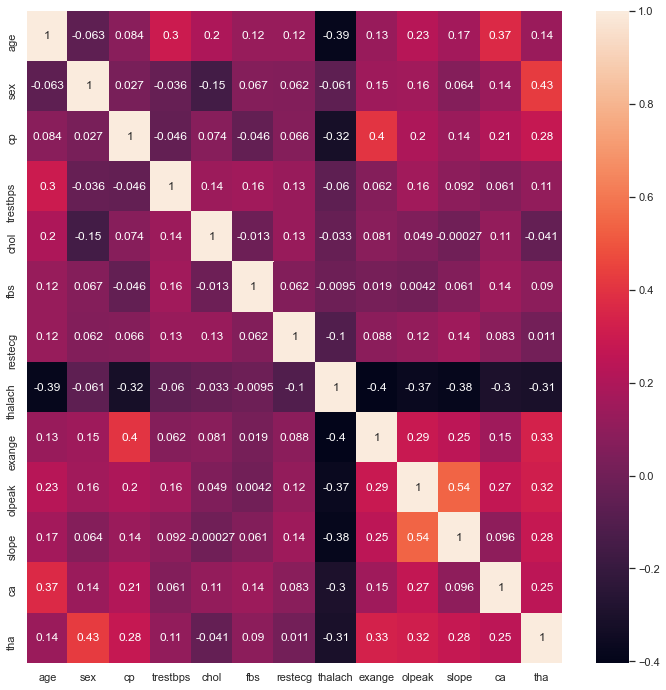

In [70]:
#Checking the Co-relation between input variables without PCA
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(X_scaled.corr(), annot=True)

In [71]:
pca=PCA(n_components=10)
pca1=pca.fit_transform(X_scaled)  # fitting the function and transforming the variables
pca2=pd.DataFrame(pca1, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10'])

<AxesSubplot:>

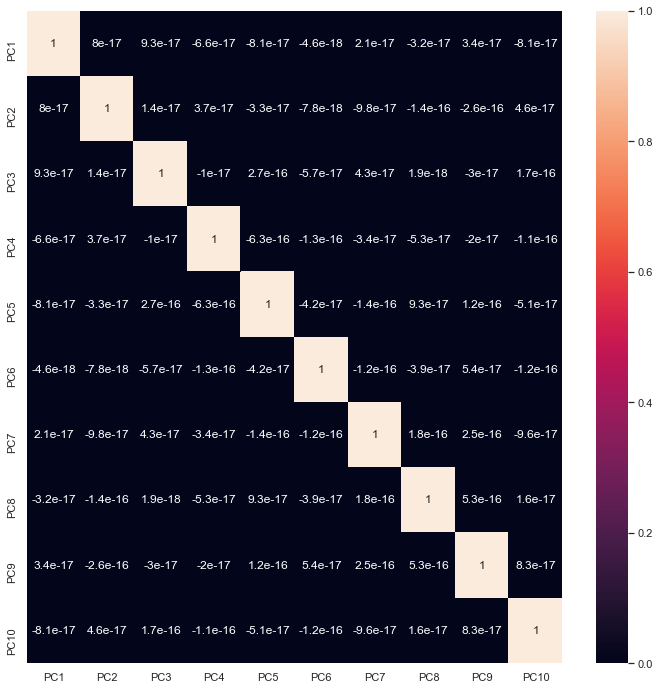

In [72]:
#Checking the Co-relation between input variables with PCA
sns.set(rc={'figure.figsize':(12,12)})
sns.heatmap(pca2.corr(), annot=True)

In [73]:
exp_var_pca = pca.explained_variance_ratio_
exp_var_pca

array([0.23840116, 0.11921272, 0.09748024, 0.08494571, 0.07651652,
       0.0681006 , 0.06699454, 0.05929345, 0.04951712, 0.04239775])

In [74]:
PCs=np.arange(len(pca2.columns))+1
PCs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [75]:
PCs=list(range(1,11))

Text(0.5, 1.0, 'Scree plot')

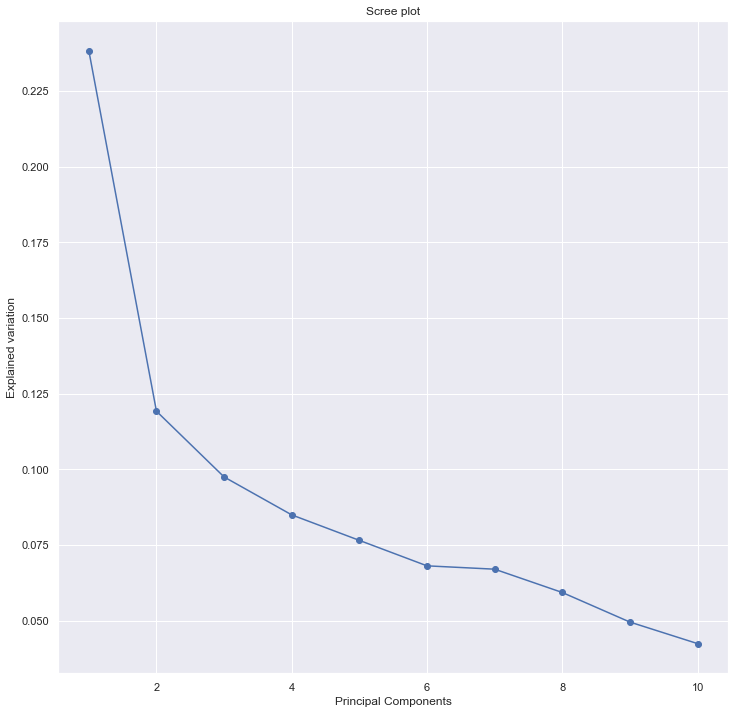

In [76]:
plt.plot(PCs, pca.explained_variance_ratio_, 'o-')
plt.xlabel("Principal Components")
plt.ylabel("Explained variation")
# plt.xlim([1,11])
plt.title("Scree plot")

##### Above graph is showing the slow decay from point 8, hence we can consider 8 PCs to build our model

In [77]:
pd.DataFrame(np.cumsum(pca.explained_variance_ratio_)*100,
             ['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6','PC7','PC8','PC9','PC10']).reset_index().rename(columns={'index':'PCs',0:'Cummulative Explained Variation %'})

,PCs,Cummulative Explained Variation %
0,PC1,23.840116
1,PC2,35.761388
2,PC3,45.509412
3,PC4,54.003983
4,PC5,61.655635
5,PC6,68.465696
6,PC7,75.165150
7,PC8,81.094495
8,PC9,86.046207
9,PC10,90.285982


In [78]:
# considering only 8 PCs as 8 features for model
X_pca=pca2.iloc[:,:-2]

In [79]:
X_train_pca, x_test_pca, Y_train, y_test=train_test_split(X_pca, Y, test_size=0.3, random_state=1)

In [80]:
LR_pca=LogisticRegression()
LR_pca.fit(X_train_pca, Y_train)

LogisticRegression()

In [81]:
y_pred_pca=LR_pca.predict(x_test_pca)

In [82]:
accuracy_score(y_test,y_pred_pca)

0.8160919540229885

In [83]:
confusion_matrix(y_test,y_pred_pca)

array([[39,  6],
       [10, 32]], dtype=int64)

### 3) Logistic Regression with Ridge Regression (L2 Regularization)

In [84]:
LR_ridge=LogisticRegression(C=0.5, penalty='l2')   # penalty = 'l1', 'l2' and 'elasticnet'
LR_ridge=LR_ridge.fit(X_train, Y_train)

In [85]:
y_pred_ridge=LR_ridge.predict(x_test)

In [86]:
accuracy_score(y_test, y_pred_ridge)

0.8390804597701149

In [87]:
confusion_matrix(y_test,y_pred_ridge)

array([[41,  4],
       [10, 32]], dtype=int64)

### 3) Logistic Regression with Lasso Regression (L1 Regularization)

In [88]:
LR_lasso=LogisticRegression(C=0.5, penalty='l1', solver='liblinear')   # penalty = 'l1', 'l2' and 'elasticnet'
LR_lasso=LR_lasso.fit(X_train, Y_train)

In [89]:
y_pred_lasso=LR_lasso.predict(x_test)    

In [90]:
accuracy_score(y_test, y_pred_lasso)

0.8275862068965517

In [91]:
confusion_matrix(y_test,y_pred_lasso)

array([[40,  5],
       [10, 32]], dtype=int64)

### 4) Logistic Regression with elasticnet regression (L1&L2 Regularization)

In [92]:
LR_en=LogisticRegression(C=0.5, penalty='elasticnet', l1_ratio=0.5, solver='saga')   # penalty = 'l1', 'l2' and 'elasticnet'
LR_en=LR_en.fit(X_train, Y_train)

In [93]:
y_pred_en=LR_en.predict(x_test)

In [94]:
accuracy_score(y_test, y_pred_en)

0.7241379310344828

In [95]:
confusion_matrix(y_test,y_pred_en)

array([[37,  8],
       [16, 26]], dtype=int64)

### 5) Discriminant Analysis (Linear Discriminant Function) : Dimentionality reduction

In [96]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [97]:
LDA=LinearDiscriminantAnalysis(n_components=1) # n_components = min(n_features, n_classes-1)
X_train_lda=LDA.fit_transform(X_train, Y_train)
x_test_lda=LDA.transform(x_test)

In [98]:
len(X_train_lda)

203

##### Logistic regression with Linear Discriminant Function

In [99]:
LR_lda=LogisticRegression()
LR_lda=LR_lda.fit(X_train_lda, Y_train)

In [100]:
y_pred_lda=LR_lda.predict(x_test_lda)

In [101]:
accuracy_score(y_test, y_pred_lda)

0.8045977011494253

In [102]:
confusion_matrix(y_test,y_pred_lda)

array([[38,  7],
       [10, 32]], dtype=int64)


### AUC ROC Curve

In [103]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

In [104]:
FPR, TPR, _ =roc_curve(y_test, y_pred_org)
AUC_score=roc_auc_score(y_test, y_pred_org)

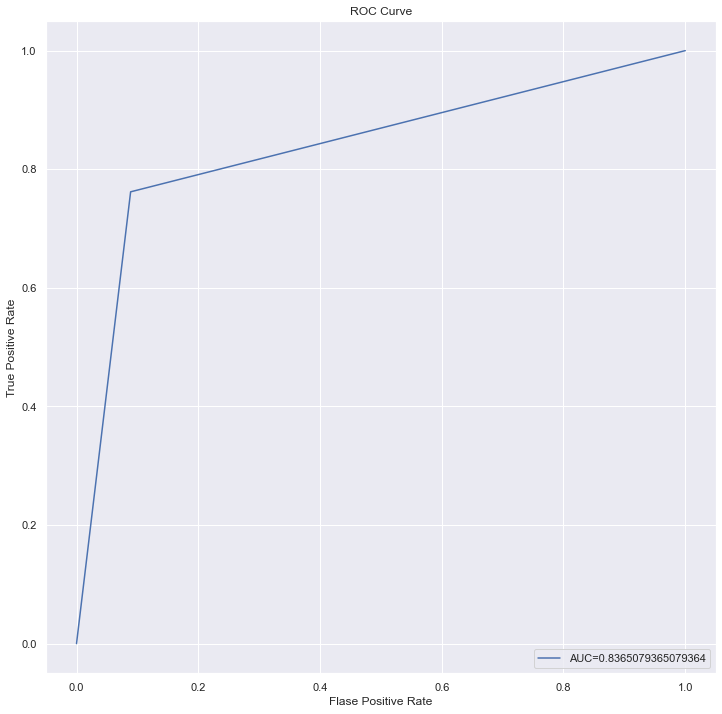

In [105]:
plt.plot(FPR, TPR, label='AUC='+str(AUC_score))
plt.title("ROC Curve")
plt.xlabel("Flase Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc=4)

In [106]:
print("The F1-score for Logistic Regression Model is:",f1_score(y_test, y_pred_org))

The F1-score for Logistic Regression Model is: 0.8205128205128205


## Feature selection techniques

In [107]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [108]:
fs=sfs(LR_org, k_features=6, forward=True, scoring='accuracy', cv=5)  # forward=True--> Forward Selection and forward=False--> backward selection
fs=fs.fit(X_train, Y_train)                                           # cv=5 is used for dividing training data into 5 subsets

In [109]:
fs.k_feature_names_

('age', 'cp', 'fbs', 'thalach', 'exange', 'tha')

In [110]:
X_train_fs=X_train[list(fs.k_feature_names_)]
x_test_fs=x_test[list(fs.k_feature_names_)]

In [111]:
LR_org_fs=LogisticRegression()
LR_org_fs=LR_org_fs.fit(X_train_fs, Y_train)

In [112]:
y_pred_org_fs=LR_org_fs.predict(x_test_fs)

In [113]:
accuracy_score(y_test, y_pred_org_fs)

0.8275862068965517

In [114]:
fs.subsets_

{1: {'feature_idx': (2,),
  'cv_scores': array([0.80487805, 0.75609756, 0.80487805, 0.75      , 0.85      ]),
  'avg_score': 0.7931707317073171,
  'feature_names': ('cp',)},
 2: {'feature_idx': (2, 12),
  'cv_scores': array([0.82926829, 0.70731707, 0.82926829, 0.825     , 0.8       ]),
  'avg_score': 0.798170731707317,
  'feature_names': ('cp', 'tha')},
 3: {'feature_idx': (2, 8, 12),
  'cv_scores': array([0.85365854, 0.75609756, 0.85365854, 0.8       , 0.9       ]),
  'avg_score': 0.8326829268292684,
  'feature_names': ('cp', 'exange', 'tha')},
 4: {'feature_idx': (0, 2, 8, 12),
  'cv_scores': array([0.87804878, 0.80487805, 0.85365854, 0.825     , 0.9       ]),
  'avg_score': 0.8523170731707317,
  'feature_names': ('age', 'cp', 'exange', 'tha')},
 5: {'feature_idx': (0, 2, 7, 8, 12),
  'cv_scores': array([0.85365854, 0.80487805, 0.85365854, 0.85      , 0.9       ]),
  'avg_score': 0.852439024390244,
  'feature_names': ('age', 'cp', 'thalach', 'exange', 'tha')},
 6: {'feature_idx': (0,

In [115]:
### Feature selection with cross validation
from sklearn.model_selection import KFold, cross_val_score

In [116]:
fs_cv=sfs(LR_org, k_features=6, forward=True, scoring='accuracy', cv=KFold(n_splits=5, shuffle=True, random_state=1)) 
fs_cv=fs_cv.fit(X_train, Y_train)

In [117]:
fs_cv.k_feature_names_

('cp', 'thalach', 'exange', 'slope', 'ca', 'tha')

In [118]:
X_train_fs_cv=X_train[list(fs_cv.k_feature_names_)]
x_test_fs_cv=x_test[list(fs_cv.k_feature_names_)]

In [119]:
LR_org_fs_cv=LogisticRegression()
LR_org_fs_cv=LR_org_fs.fit(X_train_fs_cv, Y_train)

In [120]:
y_pred_org_fs_cv=LR_org_fs_cv.predict(x_test_fs_cv)
accuracy_score(y_test, y_pred_org_fs_cv)

0.8160919540229885

In [121]:
# r square
LR_org_fs_cv.score(X_train_fs_cv, Y_train)

0.8719211822660099

### Evaluation of Logistic regression model with cross validation

In [122]:
kf=KFold(n_splits=5, shuffle=True, random_state=1)

In [123]:
cross_val_results = cross_val_score(LR_org, X_train, Y_train, cv=kf)

In [124]:
np.mean(cross_val_results), np.std(cross_val_results)

(0.8128048780487805, 0.024855321996080648)

In [125]:
cross_val_results

array([0.7804878 , 0.85365854, 0.80487805, 0.825     , 0.8       ])

### Boosting Algorithms


#### 1) AdaBoost Algorithm (Adaptive boosting algorithm) : Base Learner = Decision Tree
#####  It specially developed for binary classification. It increases the weight of wrongly classified data points and decrease the weight of correctly classified data points.

In [126]:
from sklearn.ensemble import AdaBoostClassifier

In [127]:
adaboost=AdaBoostClassifier(n_estimators=100, base_estimator=LR_org, random_state=1)
adaboost.fit(X_train, Y_train)

AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                   random_state=1)

In [128]:
y_pred_LR_ada=adaboost.predict(x_test)

In [129]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [130]:
accuracy_score(y_test, y_pred_LR_ada)

0.8160919540229885

In [131]:
mean_squared_error(y_test, y_pred_LR_ada), mean_absolute_error(y_test, y_pred_LR_ada)

(0.1839080459770115, 0.1839080459770115)

In [132]:
adaboost.score(X_train, Y_train)

0.8472906403940886

#### 2) Gradient Boosting Algorithm  Base Learner = CART (Classification and Regression)
##### Each model is trained to minimize the loss function such as mean squared error or cross entropy of the previous model. In each iteration, the algorithm computes the gradient of loss function with respect to predictions of the current model and then trains the new model to minimize this gradient.

In [133]:
from sklearn.ensemble import GradientBoostingClassifier

In [134]:
GB=GradientBoostingClassifier(n_estimators=100, learning_rate=1,random_state=1)

In [135]:
GB.fit(X_train, Y_train)

GradientBoostingClassifier(learning_rate=1, random_state=1)

In [136]:
y_pred_GB=GB.predict(x_test)

In [137]:
accuracy_score(y_test, y_pred_GB)

0.7931034482758621

In [138]:
# # in case of regression problem
# from sklearn.ensemble import GradientBoostingRegressor
# GB_reg=GradientBoostingRegressor(n_estimators=100, loss='squared_error',learning_rate=1,random_state=1)
# GB_reg.fit(X_train, Y_train)

### 3) XG Boost Algorithm (Extreme Gradient Boosting)

In [139]:
import xgboost as xgb

In [140]:
# pip install xgboost

In [141]:
# data['cp']=data['cp'].astype('category')  before procedding to XGBOOST model building

In [142]:
xgb_train=xgb.DMatrix(X_train, Y_train, enable_categorical=True)
xgb_test=xgb.DMatrix(x_test, y_test, enable_categorical=True)

In [143]:
params={'objective':'binary:logistic', 'max_depth':3, 'learning_rate':1}

In [144]:
LR_org_xgb=xgb.train(params=params, dtrain=xgb_train, num_boost_round=100)

In [145]:
pred=LR_org_xgb.predict(xgb_test).astype('int')

In [146]:
accuracy_score(y_test, pred)

0.5172413793103449

In [147]:
np.empty(1)

array([45.])

### Logistic regression using statsmodels library

In [148]:
import statsmodels.api as sm

In [149]:
LR_sm=sm.Logit(Y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.339297
         Iterations 7


In [150]:
LR_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          heart_disease   No. Observations:                  203
Model:                          Logit   Df Residuals:                      190
Method:                           MLE   Df Model:                           12
Date:                Fri, 29 Mar 2024   Pseudo R-squ.:                  0.5042
Time:                        09:14:08   Log-Likelihood:                -68.877
converged:                       True   LL-Null:                       -138.91
Covariance Type:            nonrobust   LLR p-value:                 5.821e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0530      0.027     -1.962      0.050      -0.106   -5.15e-05
sex            0.7034      0.589      1.195      0.232      -0.450       1.857
cp             0.5660      0.223      2.534      0.011       0.128       1.004
trestbps       0.0188      0.013      1.486      0.137      -0.006       0.044
chol           0.0047      0.006      0.818      0.413      -0.007       0.016
fbs           -0.7616      0.665     -1.146      0.252      -2.065       0.541
restecg        0.1758      0.229      0.767      0.443      -0.274       0.625
thalach       -0.0456      0.011     -4.138      0.000      -0.067      -0.024
exange         1.0485      0.517      2.029      0.042       0.036       2.061
olpeak         0.2043      0.263      0.776      0.438      -0.312       0.720
slope          0.2935      0.422      0.696      0.487      -0.533       1.120
ca             1.1250      0.303      3.709      0.000       0.531       1.720
tha            0.3891      0.131      2.961      0.003       0.132       0.647
==============================================================================
"""

In [151]:
y_pred_LR_sm=LR_sm.predict(x_test)


In [152]:
# def round_val(x):
#     if x>0.5:
#         return 1
#     else:
#         return 0

In [153]:
y_pred_LR_sm=y_pred_LR_sm.apply(lambda x: 1 if x>0.5 else 0)

In [154]:
accuracy_score(y_test,y_pred_LR_sm)

0.8275862068965517

https://app.breezy.hr/conversation/d6af983c263d/video/7eb879879283